# LAB-Extra 01 EDA_and_Data_Pre_processing

# Introduction

A typical machine learning (ML) workflow begins with exploratory data analysis (EDA) and data pre-processing before the actual modeling takes place.  These initial steps are as important as (if not more important than) modeling, due to the fact that ML is data hungry.  Without feeding in proper data, ML would not work well

This lab covers the following sub-topics
- Exploratory Data Analysis
- Data Visualization
- Data Preprocessing 
- Dimensionality Reduction


## 1. Exploratory Data Analysis (EDA)
The very first step involves developing a sense of what data you are dealing with.  We ask ourselves questions such as
- Are they all numerical data?  Are they discrete or continuous?  Any categorical data?
- What about the distribution of data?
- Are there outliers?
- Is the dataset balanced?

## Import Data and Packages

The file that we will be analysing is the Iris dataset originally from https://archive.ics.uci.edu/ml/datasets/iris. For the purpose of this lab, we have augmented the dataset slightly. 


The features are:
- `sepal_length`: sepal length in cm
- `sepal_width`: sepal width in cm
- `petal_length`: petal length in cm
- `petal_width`: petal width in cm
- `species`: class of the Iris
    - Setosa
    - Versicolour
    - Virginica
- `buy`: whether or not we bought this particular Iris
    
Documentation for importing data using pandas: https://pandas.pydata.org/pandas-docs/stable/reference/io.html

In [2]:
# Import packages
import numpy as np
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelBinarizer

import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

df = pd.read_csv('iris_augmented.csv')

## Peek into a Sample of the Data

Use `head` and `tail` to retrieve the top and bottom `n` rows. Use `sample` to randomly view (sample) `n` rows

In [2]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,buy,variety
0,5.1,3.5,1.4,0.2,1,Setosa
1,4.9,3.0,1.4,0.2,1,Setosa
2,4.7,3.2,1.3,0.2,1,Setosa
3,4.6,3.1,1.5,0.2,0,Setosa
4,5.0,3.6,1.4,0.2,1,Setosa


In [3]:
df.head(2)

,sepal_length,sepal_width,petal_length,petal_width,buy,variety
0,5.1,3.5,1.4,0.2,1,Setosa
1,4.9,3.0,1.4,0.2,1,Setosa


In [4]:
df.tail()

,sepal_length,sepal_width,petal_length,petal_width,buy,variety
145,6.7,3.0,5.2,2.3,1,Virginica
146,6.3,2.5,5.0,1.9,0,Virginica
147,6.5,3.0,5.2,2.0,1,Virginica
148,6.2,3.4,5.4,2.3,1,Virginica
149,5.9,3.0,5.1,1.8,0,Virginica


In [5]:
df.sample(5)

,sepal_length,sepal_width,petal_length,petal_width,buy,variety
122,7.7,2.8,6.7,2.0,1,Virginica
102,7.1,3.0,5.9,2.1,1,Virginica
69,5.6,2.5,3.9,1.1,0,Versicolor
16,5.4,3.9,1.3,0.4,0,Setosa
57,4.9,2.4,3.3,NaN,0,Versicolor


## Summary Statistics

The `describe` function can be used to compute summary statistics of non-null (`NaN`) values of each feature. 

In [8]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
sepal_length,145.0,NaN,NaN,NaN,5.844828,0.84228,4.3,5.1,5.7,6.4,7.9
sepal_width,150.0,NaN,NaN,NaN,3.048,0.454023,1.1,2.8,3.0,3.3,4.4
petal_length,149.0,NaN,NaN,NaN,3.814094,1.979422,1.0,1.6,4.4,5.1,15.0
petal_width,143.0,NaN,NaN,NaN,1.207692,0.780581,0.1,0.3,1.4,1.8,2.5
buy,150.0,NaN,NaN,NaN,0.433333,0.497196,0.0,0.0,0.0,1.0,1.0
variety,150,3,Setosa,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Pass `all` to the optional parameter `include` to retrieve summaries for both numerical and categorical features.

## Filter (Query) Data
Now that you have taken a quick look at your data and have seen what it’s about, you’re ready to dive a little bit deeper.


The `query` function allows you to test some very simple hypotheses that you have about your data, such as “Is the petal length usually greater than the sepal length?” or “Is the petal length sometimes equal to the sepal length?”.

In [11]:
# Petal length greater than sepal length?

df.query('petal_length > sepal_length')

,sepal_length,sepal_width,petal_length,petal_width,buy,variety
118,7.7,2.6,15.0,2.3,1,Virginica


In [12]:
# an equivalent alternative

df.loc[ df['petal_length'] > df['sepal_length']]

,sepal_length,sepal_width,petal_length,petal_width,buy,variety
118,7.7,2.6,15.0,2.3,1,Virginica


In [13]:
# Sample 10 records of the 'Versicolor' variety

df.loc[df['variety'] == 'Versicolor'].sample(10)

,sepal_length,sepal_width,petal_length,petal_width,buy,variety
82,5.8,2.7,3.9,1.2,0,Versicolor
80,5.5,2.4,3.8,NaN,0,Versicolor
90,5.5,2.6,4.4,1.2,0,Versicolor
93,5.0,2.3,3.3,1.0,0,Versicolor
89,5.5,2.5,4.0,1.3,0,Versicolor
72,6.3,2.5,4.9,1.5,0,Versicolor
56,6.3,3.3,4.7,1.6,1,Versicolor
76,6.8,2.8,4.8,1.4,1,Versicolor
70,5.9,3.2,4.8,1.8,0,Versicolor
75,6.6,3.0,4.4,1.4,1,Versicolor


## 2.  Data Visualization
There is an abundance of visualization options in Python, and even more if you don't limit yourself to Python (e.g. using Tableau, R, etc). Visualizations are useful in analysis of distributions, correlations and understanding your data better in general.


Some commonly used packages for visualisation in Python are matplotlib, seaborn and bokeh.

### Bar Chart

We can use a bar chart to visualize the distribution of categorical variables

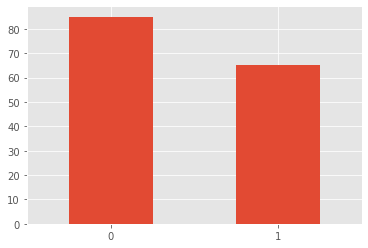

In [15]:
df['buy'].value_counts().plot(kind='bar')

plt.xticks(rotation=0)
plt.show()

### Boxplot

For continuous numerical variables we can use a boxplot to give us a sense of the spread of data.  Boxplot is useful especially for identifying outliers.

In [16]:
df[['sepal_width','sepal_length']]

,sepal_width,sepal_length
0,3.5,5.1
1,3.0,4.9
2,3.2,4.7
3,3.1,4.6
4,3.6,5.0
...,...,...
145,3.0,6.7
146,2.5,6.3
147,3.0,6.5
148,3.4,6.2


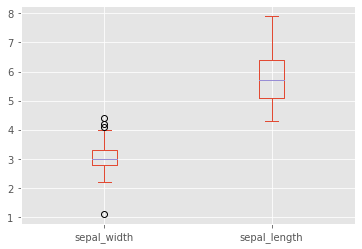

In [17]:
df[['sepal_width','sepal_length']].plot(kind='box')
plt.show()

### Histogram

To plot the actual distribution for the given variables we use a histogram instead

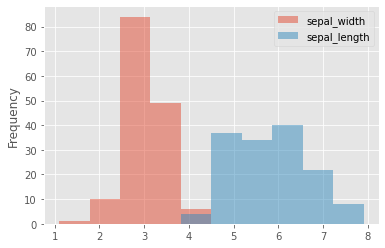

In [19]:
df[["sepal_width","sepal_length"]].plot(kind='hist', alpha=0.5, bins=10)
plt.show()

### Correlation plot 

To better visualize the relationship between two variables we could use a scatter plot

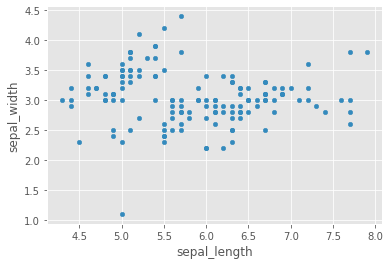

In [21]:
df[['sepal_length', 'sepal_width']].plot(kind='scatter', x='sepal_length', y='sepal_width')
plt.show()

### Heatmap

A heatmap gives a quick summary of correlation between *all* pairs of variables.  This gives a visual indication of which pairs are strongly correlated and which pairs are not

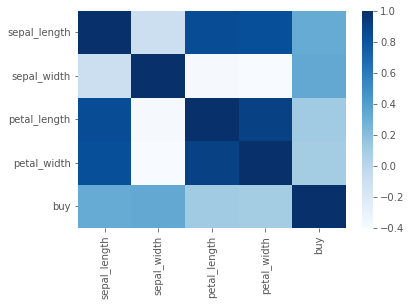

In [22]:
# Compute the correlation matrix
corr = df.corr()

# Draw heatmap
sns.heatmap(corr, cmap="Blues")

plt.show()

### Visualization involving multiple variables

<AxesSubplot:xlabel='variety', ylabel='count'>

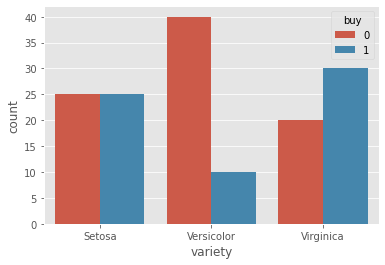

In [23]:
sns.countplot(x='variety', hue='buy', data=df)

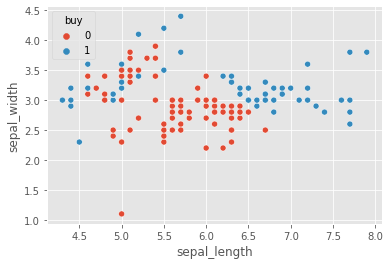

In [24]:
sns.scatterplot(x='sepal_length', y='sepal_width', hue='buy', data=df)
plt.show()

## 3. Data Preprocessing

After an intial EDA, we move on to prepare our data before building our model.  Here we go through the some common issues with real life data and basic strategies to deal with them.

### Issue 1: Outliers
Outliers can be identified as data points that are more than 3 standard deviations from the mean, amongst other methods.


Some ways to handle outliers:
- Deletion
- Transformation
- Imputation 

Let's first write a function `three_sd_range` to identify the upper and lower bound values which are 3 standard deviations away from mean

In [25]:
def three_sd_range(series):
    mean = series.mean()
    sd = series.std()
    low = mean - 3*sd
    high = mean + 3*sd
    
    return (low, high)

In [20]:
lower, upper = three_sd_range(df['sepal_width'])
lower, upper

(1.6859309067579953, 4.410069093242006)

In [21]:
df_no_outliers  = df[ (df.sepal_width>=lower) & (df.sepal_width<=upper)]
df_no_outliers.sepal_width.describe()

count    149.000000
mean       3.061074
std        0.426284
min        2.200000
25%        2.800000
50%        3.000000
75%        3.300000
max        4.400000
Name: sepal_width, dtype: float64

Now, lets apply the function `three_sd_range` to filter out outliers across all the columns in the dataframe.

In [22]:
for col_name in ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']:
    lower, upper = three_sd_range(df[col_name])
    has_outlier = (df[col_name].min() < lower) or (df[col_name].max() > upper)
    print(col_name + ' has outliers: ' + str(has_outlier))
    
    if has_outlier:
        # Remove outliers
        curr_length = df[col_name].count()
        df = df[ (df[col_name]>=lower) & (df[col_name]<=upper)]
        new_length = df[col_name].count()
        row_removed = curr_length - new_length
        print(str(row_removed) + ' row will be removed ')
        
    print()

sepal_length has outliers: False

sepal_width has outliers: True
1 row will be removed 

petal_length has outliers: True
1 row will be removed 

petal_width has outliers: False



### Issue 2: Missing Values

To count missing values, we can use the `isna` method to return a list of booleans indicating which ones are `NaN`, and then sum up the ones (representing `True`s). 


Methods to handle missing data:
- Deletion
- Imputation: Replacing with mean, mode, median, or other estimates

In [23]:
df.isna().sum()

sepal_length    5
sepal_width     0
petal_length    0
petal_width     6
buy             0
variety         0
dtype: int64

### Resolution 1: Deletion
`dropna` removes missing values. By default, the `axis` parameter is `0` which stands for row-wise deletion. There are other parameters you can make use of, like `subset` which allows you drop rows with missing data in specific columns. More can be found on the documentation here: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html

In [24]:
df.shape

(147, 6)

In [25]:
# Drop all rows with missing data
df.dropna(axis=0).shape

(137, 6)

In [26]:
# Drop all columns with missing data
df.dropna(axis=1).shape

(147, 4)

In [27]:
# Drop rows with missing data in specific column
df.dropna(subset=['petal_width']).shape

(141, 6)

### Resolution 2: Imputation
`fillna` is useful to populate missing values.

In [28]:
sepal_length_mean = df['sepal_length'].mean()
sepal_length_mean

5.8394366197183105

In [29]:
df['sepal_length'] = df['sepal_length'].fillna(sepal_length_mean)
df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     6
buy             0
variety         0
dtype: int64

You don’t necessarily need to pass in a value to `fillna`. You can also propagate non-null values forward or backward by adding the argument method to the `fillna` function. Pass in `ffill` or `bfill` to specify you want to fill the values backward or forward.

Imputation using median often makes more sense than simply using mean.  An example could be when we are dealing with ordinal variable.

In [30]:
petal_width_median = df['petal_width'].median()

df['petal_width'] = df['petal_width'].fillna(petal_width_median)
df['petal_width'].isna().sum()

0

## 4. Categorical Encoding

Most implementations of ML libraries only take in numerical values. If you have categorical data represented as strings, you will have to encode them before calling these libraries

In general there are two ways to encode categorical variables

* Label Encoding
* One-Hot Encoding 


You can read more about the use cases here: https://medium.com/@contactsunny/label-encoder-vs-one-hot-encoder-in-machine-learning-3fc273365621

The choice of encoding technique often depends on the algorithm you plan to use. For example, algorithms like logistic regression, decision trees, and random forests can directly handle multi-class categorical data without requiring special encoding. On the other hand, neural networks typically work better with one-hot encoding.

In [31]:
# Check the data types
df.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
buy               int64
variety          object
dtype: object

### Label Encoding
Usually used on target variable, it assigns an integer to each category. For ordinal features, consider OrdinalEncoder instead.

In [32]:
df['variety']

0         Setosa
1         Setosa
2         Setosa
3         Setosa
4         Setosa
         ...    
145    Virginica
146    Virginica
147    Virginica
148    Virginica
149    Virginica
Name: variety, Length: 147, dtype: object

In [33]:
labelencoder = LabelEncoder()
df['variety_encoded'] = labelencoder.fit_transform(df['variety'])
df.dtypes

sepal_length       float64
sepal_width        float64
petal_length       float64
petal_width        float64
buy                  int64
variety             object
variety_encoded      int64
dtype: object

In [34]:
df.sample(10)

,sepal_length,sepal_width,petal_length,petal_width,buy,variety,variety_encoded
113,5.7,2.5,5.0,2.0,0,Virginica,2
68,6.2,2.2,4.5,1.5,0,Versicolor,1
91,6.1,3.0,4.6,1.4,0,Versicolor,1
102,7.1,3.0,5.9,2.1,1,Virginica,2
124,6.7,3.3,5.7,2.1,1,Virginica,2
38,4.4,3.0,1.3,0.2,1,Setosa,0
100,6.3,3.3,6.0,2.5,1,Virginica,2
112,6.8,3.0,5.5,2.1,1,Virginica,2
99,5.7,2.8,4.1,1.3,0,Versicolor,1
76,6.8,2.8,4.8,1.4,1,Versicolor,1


### One-Hot Encoding
Usually a good choice for nominal data, and situations where a record belongs in more than one category. However, given _n_ categories, _n_ columns are added to your dataset which can greatly increase model complexity.

In [36]:
labelbinarizer = LabelBinarizer()
x = labelbinarizer.fit_transform(df["variety"])
encoded_df = pd.DataFrame(x, columns=labelbinarizer.classes_)
encoded_df.head()

,Setosa,Versicolor,Virginica
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [37]:
df = pd.concat([df.reset_index(), encoded_df], axis=1)
df.sample(10)


,index,sepal_length,sepal_width,petal_length,petal_width,buy,variety,variety_encoded,Setosa,Versicolor,Virginica
22,22,4.6,3.6,1.0,0.2,1,Setosa,0,1,0,0
102,104,6.5,3.0,5.8,2.2,1,Virginica,2,0,0,1
26,26,5.0,3.4,1.6,0.4,0,Setosa,0,1,0,0
77,79,5.7,2.6,3.5,1.4,0,Versicolor,1,0,1,0
51,51,6.4,3.2,4.5,1.5,1,Versicolor,1,0,1,0
48,48,5.3,3.7,1.5,0.2,0,Setosa,0,1,0,0
5,5,5.4,3.9,1.7,0.4,0,Setosa,0,1,0,0
55,55,5.7,2.8,4.5,1.3,0,Versicolor,1,0,1,0
133,136,6.3,3.4,5.6,2.4,1,Virginica,2,0,0,1
4,4,5.0,3.6,1.4,0.2,1,Setosa,0,1,0,0


## 5. Dimensionality reduction

A high-dimensional dataset is a dataset that has a great number of columns (or variables). Such a dataset presents many mathematical or computational challenges. The good news is that variables (or called features) are often correlated — high-dimensional data are dominated by a small number of variables. We can find a set of variables to represent the same level of information in the data or transform the variables to a new set of variables without losing much information. Although high-power computing can somehow handle high-dimensional data, in many applications it is still necessary to reduce the dimensionality of the original data. In this part, we will cover both Principle component analysis (PCA) and Singular value decomposition (SVD). 

### Principal Component Analysis (PCA)

The idea of principal component analysis (PCA) is to reduce the dimensionality of a dataset consisting of a large number of related variables while retaining as much variance in the data as possible. PCA finds a set of new variables as linear combination of the original variables. The new variables are called Principal Components (PCs). These principal components are orthogonal: In a 3-D case, the principal components are perpendicular to each other. 
Figure below shows the intuition of PCA: it “rotates” the axes to line up better with your data. The first principal component will capture most of the variance in the data, then followed by the second, third, and so on. As a result the new data will have fewer 'important' dimensions.

![](https://miro.medium.com/max/408/1*d30YKpg-mAMWI3ekYM1plA.png)

Note that variables should be on the same scale before applying PCA, otherwise, a feature with large values will dominate the result.

In [3]:
from sklearn.preprocessing import StandardScaler

variables = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
x = df[variables]
x = StandardScaler().fit_transform(x)
x = pd.DataFrame(x, columns=variables)
x = x.fillna(x.mean())

print("Transformed x variables:")
x

Transformed x variables:


,sepal_length,sepal_width,petal_length,petal_width
0,-0.887365,0.998879,-1.223709,-1.295489
1,-1.125639,-0.106076,-1.223709,-1.295489
2,-1.363913,0.335906,-1.274399,-1.295489
3,-1.483050,0.114915,-1.173019,-1.295489
4,-1.006502,1.219870,-1.223709,-1.295489
...,...,...,...,...
145,1.018826,-0.106076,0.702518,1.404271
146,0.542279,-1.211031,0.601138,0.890031
147,0.780552,-0.106076,0.702518,1.018591
148,0.423142,0.777888,0.803899,1.404271


In [4]:
from sklearn.decomposition import PCA

pca = PCA(n_components=4)

x_pca = pca.fit_transform(x)

x_pca = pd.DataFrame(x_pca)
x_pca[[0,1]]

,0,1
0,-2.170350,-0.483496
1,-2.002404,0.628213
2,-2.274361,0.309851
3,-2.219360,0.555285
4,-2.291585,-0.643575
...,...,...
145,1.760446,-0.379087
146,1.455547,0.851548
147,1.418741,-0.270349
148,1.271876,-0.978521


We can use `pca.explained_variance_ratio_` to return a vector of the variance explained by each of the principle component:

It shows the first principal component accounts for 73% variance and the second component accounts for 22.8% of the variance respectively. Around 96% of the information is captured by the first and second principal components. We often want to keep only the significant features and drop the insignificant ones. A rule of thumb is to keep the top principal components that capture about 80% of variance and ignore the small ones. 

In [5]:
pca.explained_variance_ratio_

array([0.70519716, 0.23757047, 0.03484697, 0.02238541])

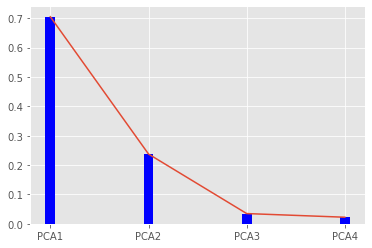

In [6]:
x_names =[]
y= pca.explained_variance_ratio_

for i in range(len(y)):
    x_names.append('PCA'+str(i+1))

default_x_ticks = range(len(x_names))

plt.plot(default_x_ticks, y)
plt.bar(default_x_ticks, y,width=0.1,color= 'blue')
plt.xticks(default_x_ticks, x_names)
plt.show()

### Optional 

### Singular Value Decomposition (SVD)

SVD is a data summary method similar to PCA. It extracts important features from data. But there is one more advantage of SVD: it can compress the original dataset into a small dataset. So it has wide applications such as image compression. For example, if you have a 32\*32 = 1,024-pixel image, SVD can 'summarise' it with much fewer feaures resulting in an image with much less than 1024 pixels, at the same time without losing too much information


In formal terms, SVD works with any real m × n matix $A$. Given a real m × n matrix $A$, there exists an orthogonal m × m matrix $U$, an orthogonal matrix n × n $V$, and a diagonal m × n matrix $Σ$ such that $A=U\Sigma V^T$. To get k principal components we multiply $UΣ$ by selecting only k columns from $Σ$ 

In [56]:
x

,sepal_length,sepal_width,petal_length,petal_width
0,-0.905902,1.020866,-1.331809,-1.320709
1,-1.150928,-0.153370,-1.331809,-1.320709
2,-1.395953,0.316325,-1.388721,-1.320709
3,-1.518465,0.081478,-1.274898,-1.320709
4,-1.028415,1.255713,-1.331809,-1.320709
...,...,...,...,...
142,1.054298,-0.153370,0.830832,1.432181
143,0.564248,-1.327605,0.717009,0.907821
144,0.809273,-0.153370,0.830832,1.038911
145,0.441735,0.786019,0.944656,1.432181


In [57]:
k = 2
u, s, vh = np.linalg.svd(x)
smat = np.zeros((147, k))
smat[:k, :k] = np.diag(s[:k])
pd.DataFrame(np.dot(u, smat))

,0,1
0,-2.268994,-0.467939
1,-2.073171,0.706079
2,-2.362336,0.372977
3,-2.295316,0.632144
4,-2.397084,-0.635593
...,...,...
142,1.880097,-0.372514
143,1.586427,0.926868
144,1.530693,-0.257820
145,1.370182,-0.999582


When we look at the variance explained, we can see that it is similar to PCA

In [58]:
var_explained = s**2/np.sum(s**2)
var_explained

array([0.73005258, 0.22801171, 0.0362134 , 0.00572231])